In [68]:
# manpulation
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler # undersampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import streamlit as st
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression


# Retail Store Sales Dataset from (kaggel)

The Retail Store Sales dataset contains transactional sales records from a retail store. It includes information such as the date of sale, store and product details, quantity sold, and total sales value. The dataset is useful for understanding sales patterns, customer demand, and performance across different product categories and time periods. It can be used for data understanding, exploratory data analysis, and sales trend analysis.

### 1) Understanding Data

* a) Understand Columns
* b) check datatypes
* c) Describe Numerical Cols
* d) Describe Categorical Cols

In [69]:
df = pd.read_csv("retail_store_sales.csv")
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [70]:
df.shape

(12575, 11)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [72]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [74]:
describe_data = df.describe()
print (describe_data)

       Price Per Unit      Quantity   Total Spent  \
count    11966.000000  11971.000000  11971.000000   
mean        23.365912      5.536380    129.652577   
min          5.000000      1.000000      5.000000   
25%         14.000000      3.000000     51.000000   
50%         23.000000      6.000000    108.500000   
75%         33.500000      8.000000    192.000000   
max         41.000000     10.000000    410.000000   
std         10.743519      2.857883     94.750697   

                    Transaction Date  
count                          12575  
mean   2023-07-12 20:23:41.105368064  
min              2022-01-01 00:00:00  
25%              2022-09-30 00:00:00  
50%              2023-07-13 00:00:00  
75%              2024-04-24 00:00:00  
max              2025-01-18 00:00:00  
std                              NaN  


In [75]:
num_columns = df.select_dtypes(include=['int64', 'float64'])
num_columns


,Price Per Unit,Quantity,Total Spent
0,18.5,10.0,185.0
1,29.0,9.0,261.0
2,21.5,2.0,43.0
3,27.5,9.0,247.5
4,12.5,7.0,87.5
...,...,...,...
12570,38.0,4.0,152.0
12571,6.5,9.0,58.5
12572,14.0,10.0,140.0
12573,14.0,6.0,84.0


In [76]:
categorical_columns = df.select_dtypes(include=object).columns
categorical_columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Payment Method',
       'Location', 'Discount Applied'],
      dtype='object')

In [77]:
categorical_description = df.describe(include=['object', 'category'])
print(categorical_description)

       Transaction ID Customer ID   Category        Item Payment Method  \
count           12575       12575      12575       11362          12575   
unique          12575          25          8         200              3   
top       TXN_6867343     CUST_05  Furniture  Item_2_BEV           Cash   
freq                1         544       1591         126           4310   

       Location Discount Applied  
count     12575             8376  
unique        2                2  
top      Online             True  
freq       6354             4219  


### 2) EXTRACT FEATURES + EDA 

In [78]:
df['Customer_Transaction_Count'] = df.groupby('Customer ID')['Transaction Date'].transform('count')


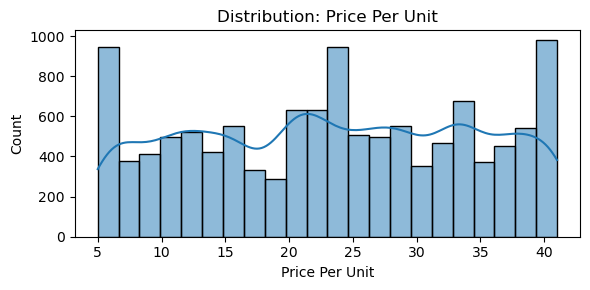

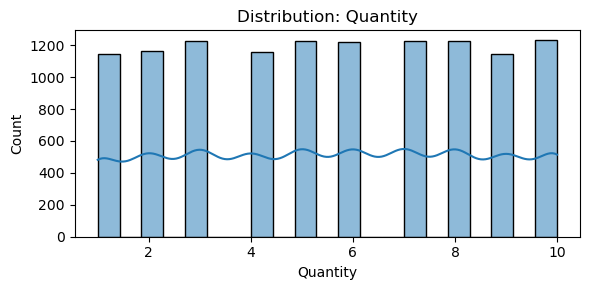

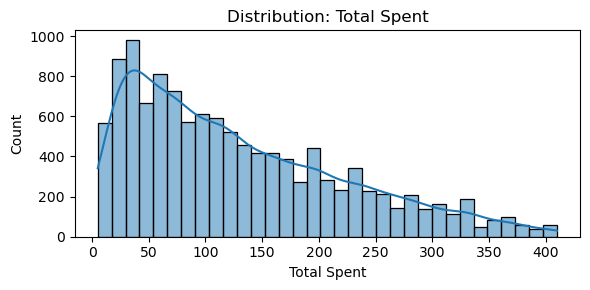

In [79]:
# This loop visualizes the distribution of each numerical column in the dataset using histograms with KDE
for col in num_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
    plt.tight_layout()
    plt.show()

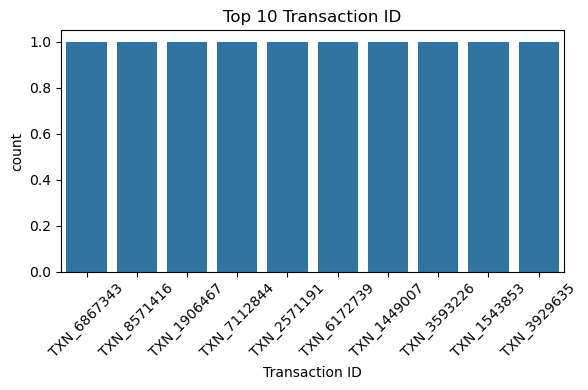

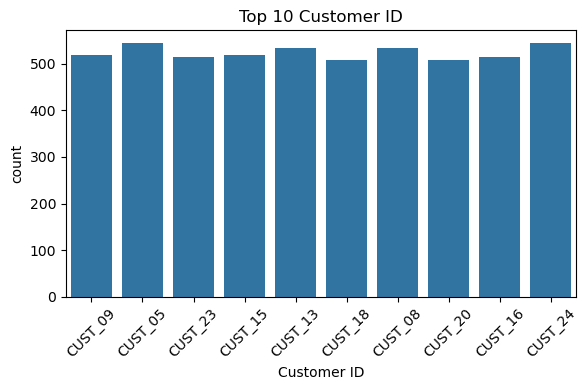

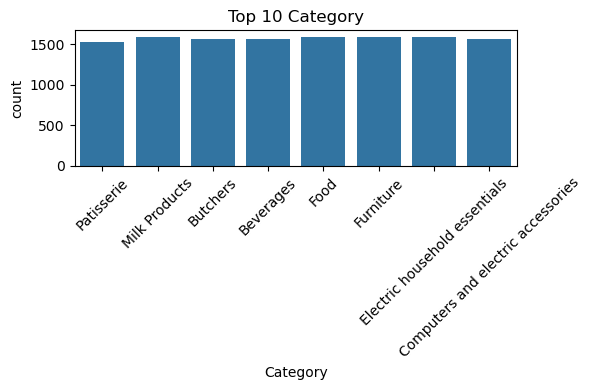

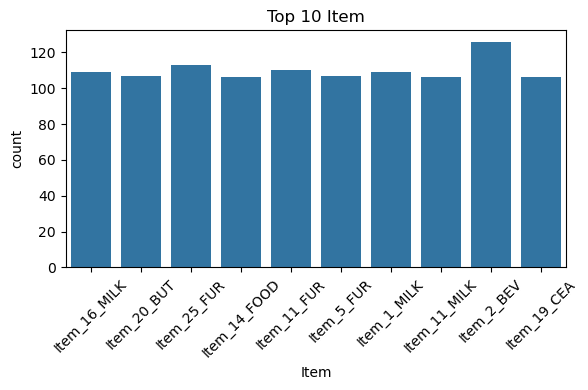

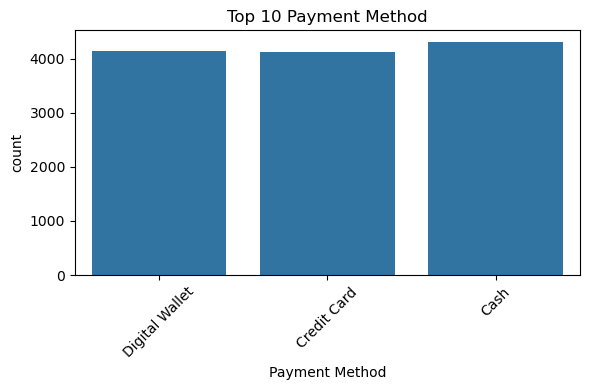

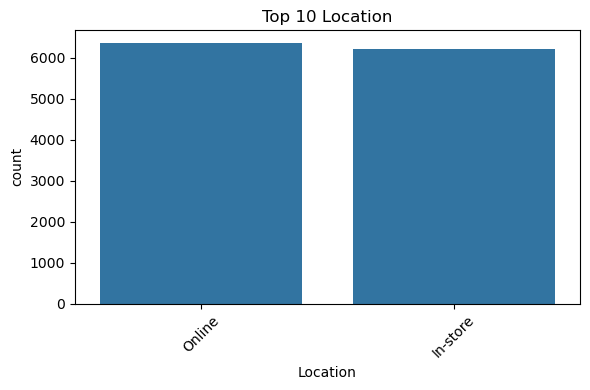

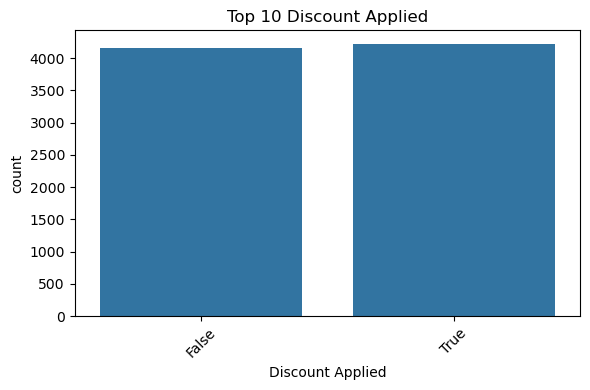

In [80]:
for col in categorical_columns:
    top_n = df[col].value_counts().nlargest(10).index
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df[df[col].isin(top_n)])
    plt.title(f"Top 10 {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 1. Is there a relationship between quantity and total spent?

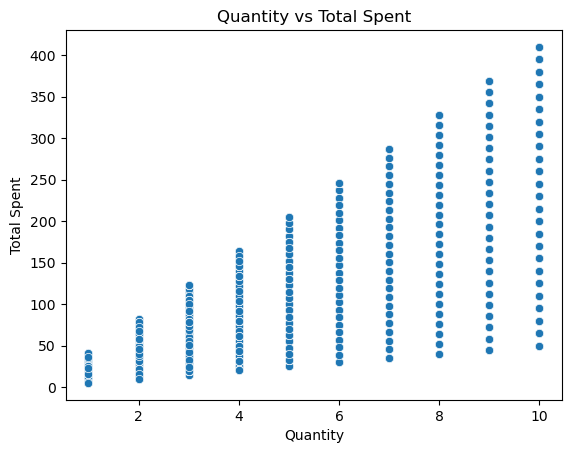

In [81]:
sns.scatterplot(data=df, x='Quantity', y='Total Spent')
plt.title("Quantity vs Total Spent")
plt.show()

# 2. How do Price Per Unit and Quantity affect Total Spent?

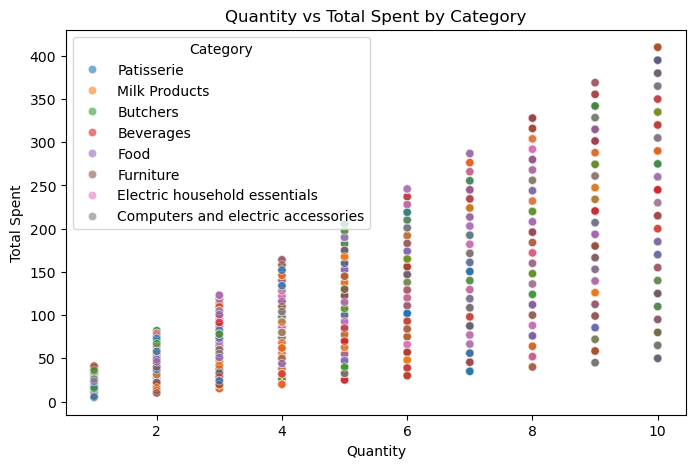

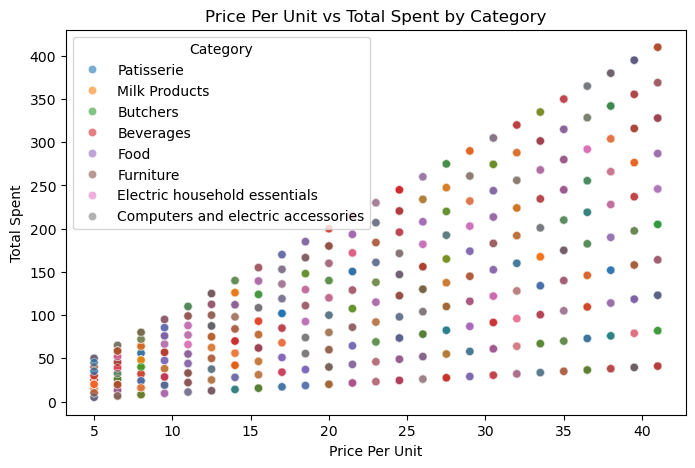

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity', y='Total Spent', data=df, hue='Category', alpha=0.6)
plt.title('Quantity vs Total Spent by Category')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Price Per Unit', y='Total Spent', data=df, hue='Category', alpha=0.6)
plt.title('Price Per Unit vs Total Spent by Category')
plt.show()

# 3. Which Category generates the highest total revenue?

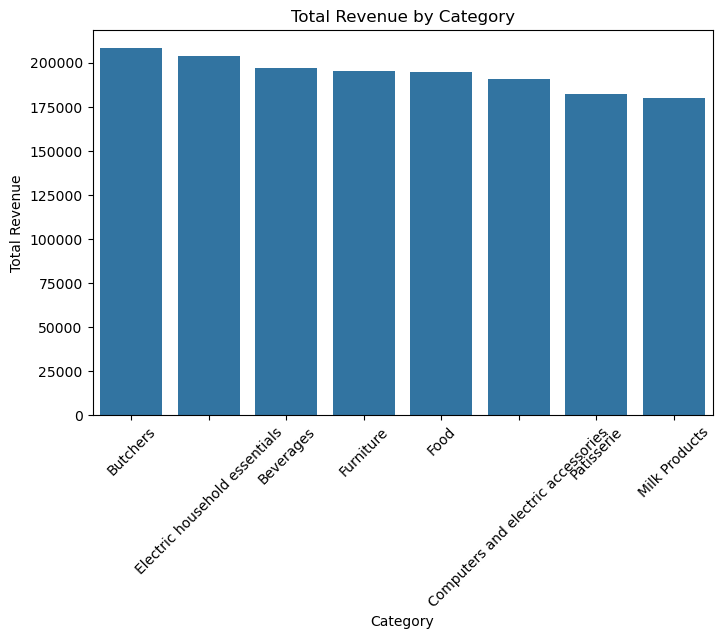

In [83]:
category_sales = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Revenue by Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


# 4. What are the top-selling Items by revenue and quantity?

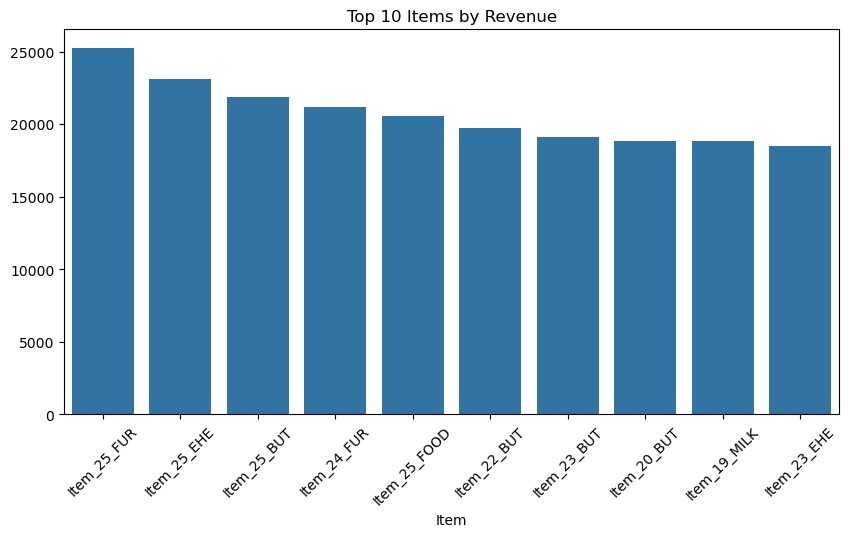

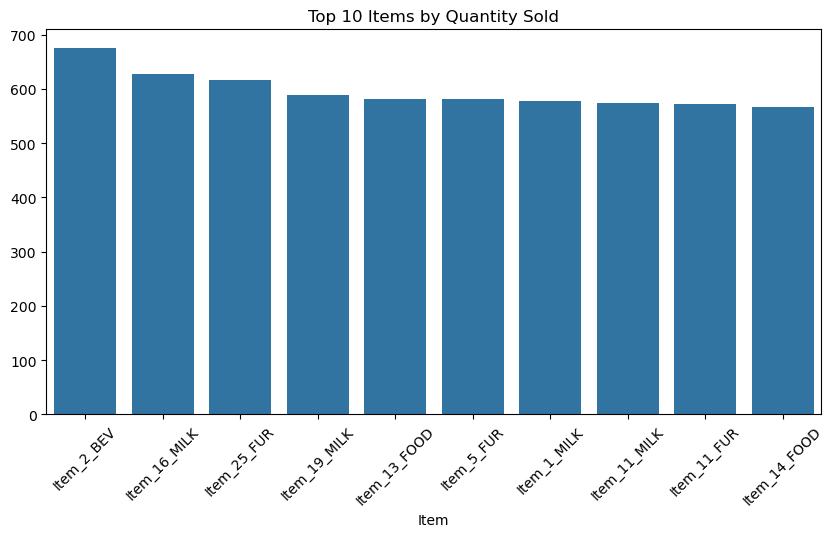

In [84]:
top_items_revenue = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)
top_items_quantity = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_items_revenue.index, y=top_items_revenue.values)
plt.title('Top 10 Items by Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_items_quantity.index, y=top_items_quantity.values)
plt.title('Top 10 Items by Quantity Sold')
plt.xticks(rotation=45)
plt.show()


# 5. How does Discount Applied influence Total Spent?

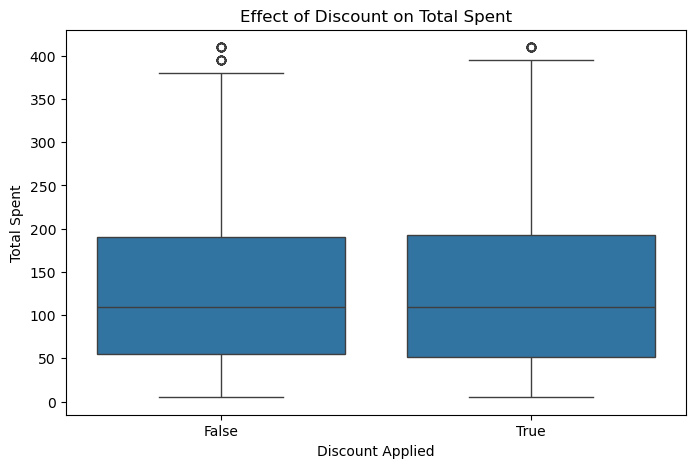

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Discount Applied', y='Total Spent', data=df)
plt.title('Effect of Discount on Total Spent')
plt.show()

# 6. Which Payment Method is most common and affects spending?

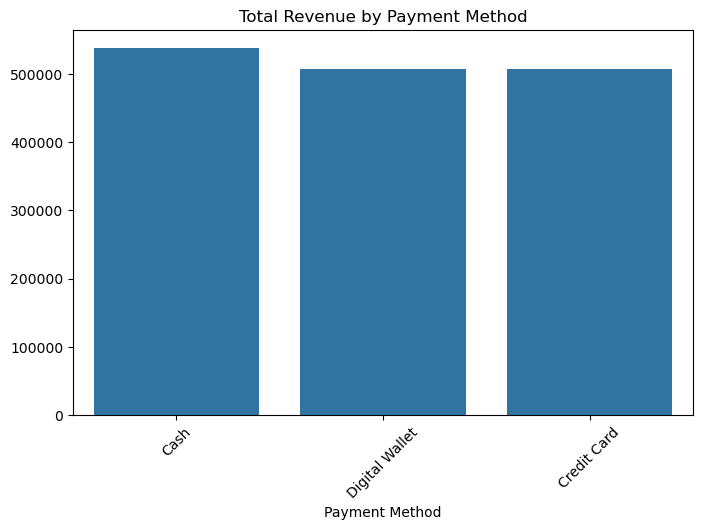

In [86]:
payment_sales = df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=payment_sales.index, y=payment_sales.values)
plt.title('Total Revenue by Payment Method')
plt.xticks(rotation=45)
plt.show()

# 7. Are there location-based differences in sales?

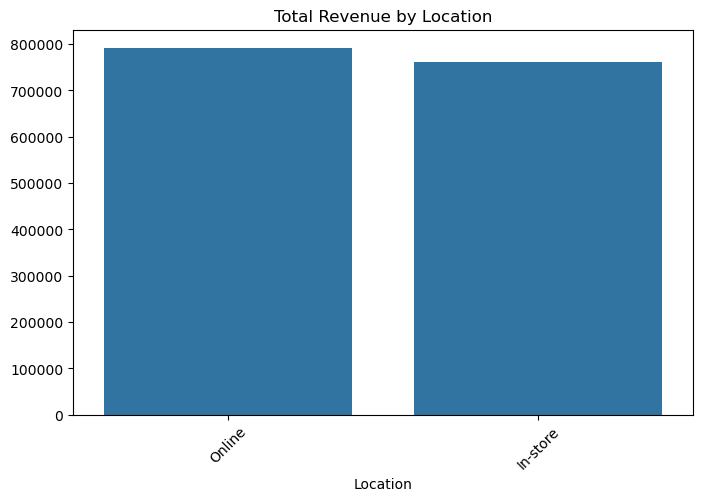

In [87]:
location_sales = df.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=location_sales.index, y=location_sales.values)
plt.title('Total Revenue by Location')
plt.xticks(rotation=45)
plt.show()

# 8. How do sales change over time?

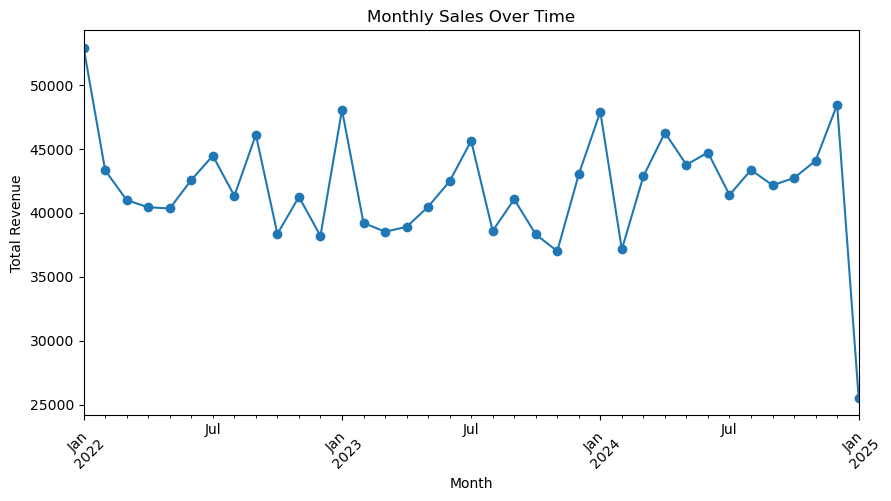

In [88]:
# Convert Transaction Date to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Group by month
monthly_sales = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# 9. Purchasing behavior of repeat vs new customers?

Repeat Customers: 25
New Customers: 0


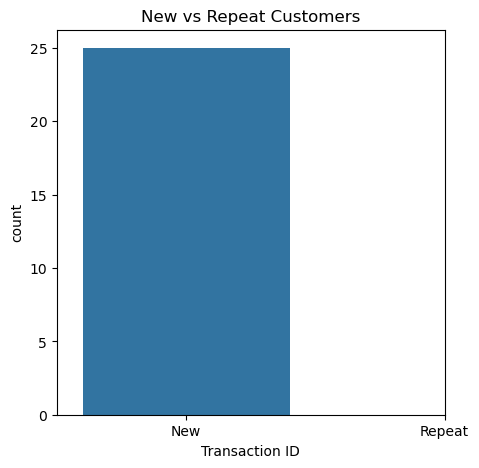

In [89]:
customer_counts = df.groupby('Customer ID')['Transaction ID'].count()
repeat_customers = customer_counts[customer_counts > 1].count()
new_customers = customer_counts[customer_counts == 1].count()

print(f"Repeat Customers: {repeat_customers}")
print(f"New Customers: {new_customers}")

plt.figure(figsize=(5,5))
sns.countplot(x=customer_counts > 1)
plt.xticks([0,1], ['New', 'Repeat'])
plt.title('New vs Repeat Customers')
plt.show()

# 10. Are there outliers in Total Spent, Quantity, or Price Per Unit?

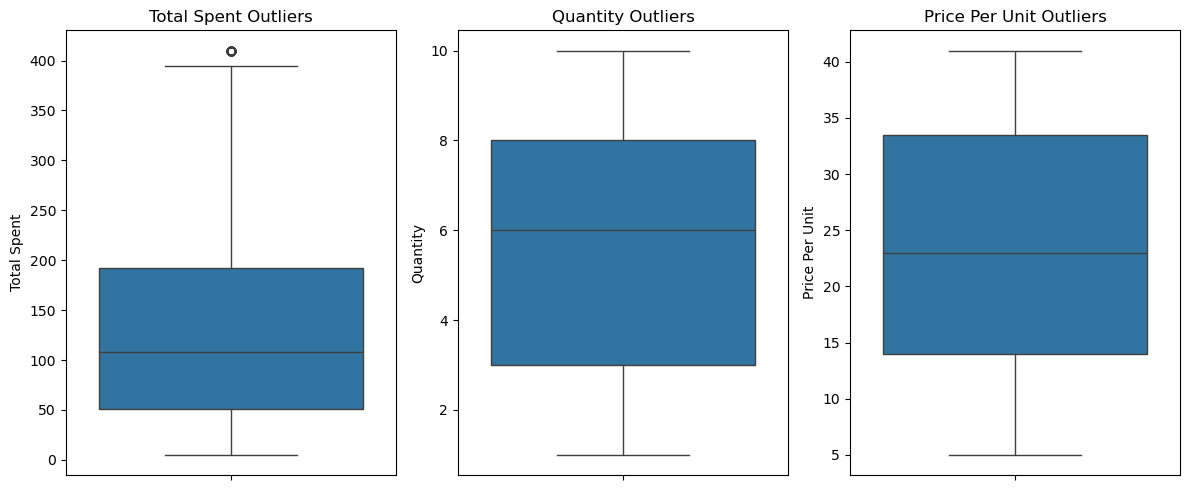

In [90]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(y='Total Spent', data=df)
plt.title('Total Spent Outliers')

plt.subplot(1,3,2)
sns.boxplot(y='Quantity', data=df)
plt.title('Quantity Outliers')

plt.subplot(1,3,3)
sns.boxplot(y='Price Per Unit', data=df)
plt.title('Price Per Unit Outliers')

plt.tight_layout()
plt.show()

### 3) Pre-Processing 

In [91]:
df.duplicated().sum()

0

In [92]:
X = df.drop(columns=['Total Spent'])
y = df['Total Spent']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [93]:
X_train.isna().sum()

Transaction ID                   0
Customer ID                      0
Category                         0
Item                           958
Price Per Unit                 475
Quantity                       483
Payment Method                   0
Location                         0
Transaction Date                 0
Discount Applied              3360
Customer_Transaction_Count       0
dtype: int64

In [94]:
# Numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].median())

# Categorical columns
cat_cols = X_train.select_dtypes(include='object').columns
X_train[cat_cols] = X_train[cat_cols].fillna('Unknown')
X_test[cat_cols] = X_test[cat_cols].fillna('Unknown')

# Final safety net (replace any remaining NaN with 0)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [95]:
df['Total Spent'].isna().sum()

604

In [96]:
df['Total Spent'] = df['Total Spent'].fillna(0)

In [97]:
X_train.isna().sum()
X_test.isna().sum()


Transaction ID                0
Customer ID                   0
Category                      0
Item                          0
Price Per Unit                0
Quantity                      0
Payment Method                0
Location                      0
Transaction Date              0
Discount Applied              0
Customer_Transaction_Count    0
dtype: int64

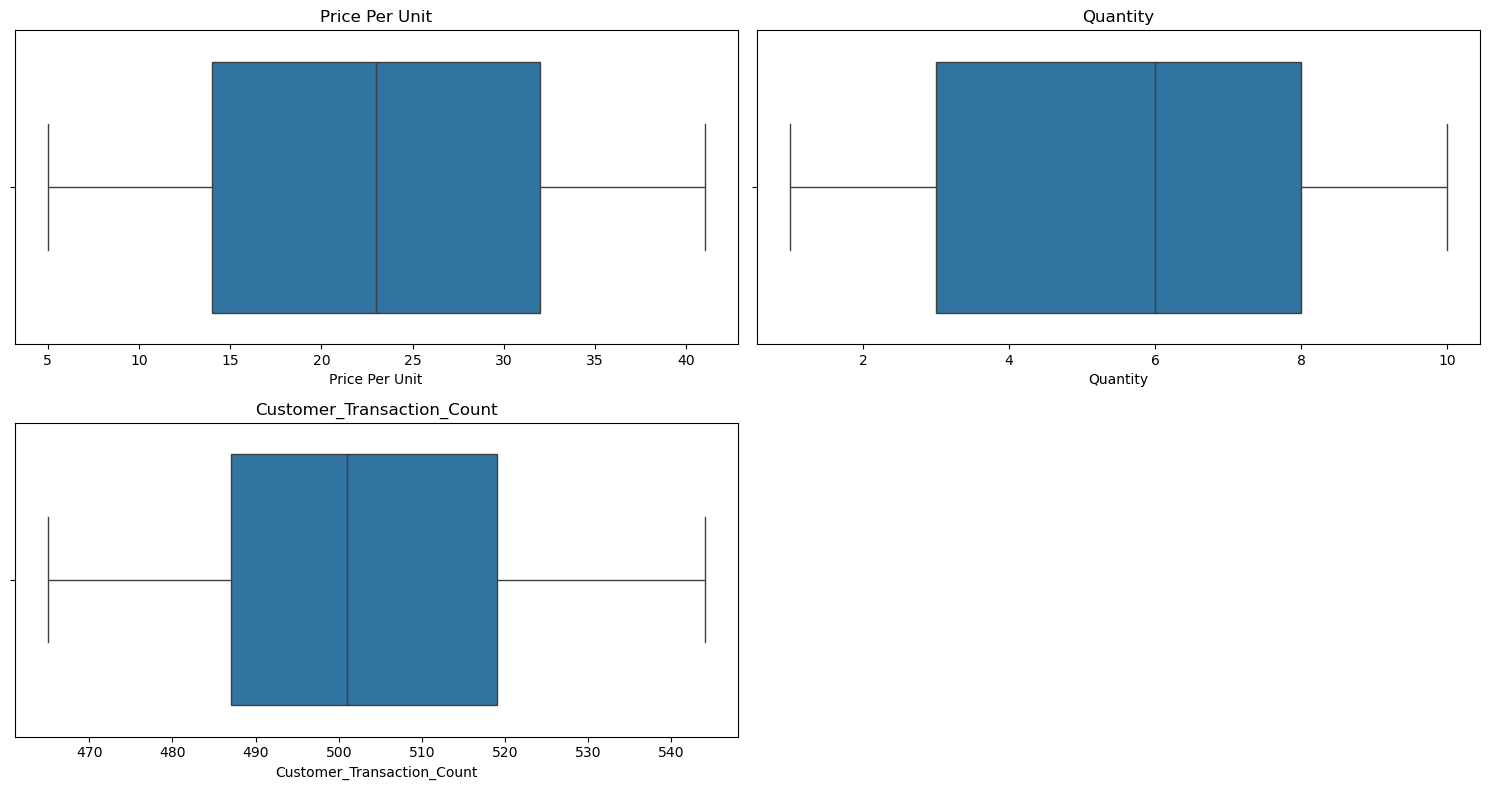

In [98]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    sns.boxplot(x=X_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [99]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

X_train = remove_outliers_iqr(X_train, num_cols)
y_train = y_train.loc[X_train.index]


In [100]:
ordinal_cols = ["Category"]           # example ordinal
nominal_cols = ["Item", "Payment Method", "Location"]

In [101]:
low_cardinality = [col for col in nominal_cols if X_train[col].nunique() < 7]
high_cardinality = [col for col in nominal_cols if X_train[col].nunique() >= 7]

In [102]:
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
binary_encoder = BinaryEncoder()

In [103]:
# Ordinal
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

# One-Hot (<7 unique)
ohe_train = onehot_encoder.fit_transform(X_train[low_cardinality])
ohe_test = onehot_encoder.transform(X_test[low_cardinality])

ohe_cols = onehot_encoder.get_feature_names_out(low_cardinality)

X_train = X_train.drop(columns=low_cardinality)
X_test = X_test.drop(columns=low_cardinality)

X_train[ohe_cols] = ohe_train
X_test[ohe_cols] = ohe_test

# Binary Encoding (>7 unique)
X_train = binary_encoder.fit_transform(X_train)
X_test = binary_encoder.transform(X_test)


In [104]:
X_train = X_train.drop(columns=["Transaction Date"])
X_test = X_test.drop(columns=["Transaction Date"])

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 4) Modeling Steps

In [106]:
# * 1) Simple Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
print(y_train.isna().sum())

483


In [108]:
# Find indices where y_train is not NaN
not_nan_indices = y_train.dropna().index

# Filter both X_train and y_train
X_train = X_train.loc[not_nan_indices]
y_train = y_train.loc[not_nan_indices]

# scaled X_train before, you need to re-scale after dropping rows:
# Example:
scaler = RobustScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train)

In [109]:
from sklearn.metrics import root_mean_squared_error

lin_reg.fit(X_train_resampled_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_resampled_scaled) 

print(f"Train Accuracy: {lin_reg.score(X_train_resampled_scaled, y_train)}")
print(f"Train RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_train_pred)}")

Train Accuracy: 0.8753193984283193
Train RMSE: 33.349475738847794


In [110]:
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)

lasso.fit(X_train_resampled_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,10000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [111]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [112]:
print(X_test_scaled.shape)
print(y_test.shape)
print(y_pred_lasso.shape)

(2515, 38)
(2515,)
(2515,)


In [113]:
print(np.isnan(X_test_scaled).sum())
print(y_test.isna().sum())
print(np.isnan(y_pred_lasso).sum())

0
121
0


In [114]:
valid_idx = y_test.dropna().index

y_test_clean = y_test.loc[valid_idx]
X_test_clean = X_test.loc[valid_idx]

# Re-scale test data
X_test_scaled = scaler.transform(X_test_clean)

# Re-predict
y_pred_lasso = lasso.predict(X_test_scaled)


In [115]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lasso = mean_squared_error(y_test_clean, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test_clean, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso:.2f}")
print(f"Lasso RMSE: {rmse_lasso:.2f}")
print(f"Lasso R²: {r2_lasso:.2f}")

Lasso MSE: 1187.43
Lasso RMSE: 34.46
Lasso R²: 0.87


In [116]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    random_state=42
)

dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [117]:
# Combine X_test and y_test
test_data = X_test.copy()
test_data["Total Spent"] = y_test

# Drop rows where target is NaN
test_data = test_data.dropna(subset=["Total Spent"])

# Split back
X_test_clean = test_data.drop(columns=["Total Spent"])
y_test_clean = test_data["Total Spent"]


In [118]:
y_pred_dt = dt.predict(X_test_clean)

In [119]:
mse_dt = mean_squared_error(y_test_clean, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test_clean, y_pred_dt)

print(f"Decision Tree MSE  : {mse_dt:.2f}")
print(f"Decision Tree RMSE : {rmse_dt:.2f}")
print(f"Decision Tree R²   : {r2_dt:.2f}")
print(f"Decision Tree Accuracy (R² %) : {r2_dt * 100:.2f}%")

Decision Tree MSE  : 600.03
Decision Tree RMSE : 24.50
Decision Tree R²   : 0.93
Decision Tree Accuracy (R² %) : 93.48%


# Streamlit

In [120]:
import joblib
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(payment_encoder, "payment_encoder.pkl")
joblib.dump(location_encoder, "location_encoder.pkl")

['location_encoder.pkl']